<a href="https://colab.research.google.com/github/RagulDossR/Web-D/blob/main/srp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# 📌 Step 2: Load Your Dataset
# Make sure you've uploaded your dataset to the correct path
df = pd.read_csv('/content/drive/MyDrive/projects/SRP/Dataset/injury_data.csv')

# Preview
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1000, 7)


,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [ ]:
# 📌 Step 3: Basic Data Check
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)



Missing Values:
 Player_Age              0
Player_Weight           0
Player_Height           0
Previous_Injuries       0
Training_Intensity      0
Recovery_Time           0
Likelihood_of_Injury    0
dtype: int64

Data Types:
 Player_Age                int64
Player_Weight           float64
Player_Height           float64
Previous_Injuries         int64
Training_Intensity      float64
Recovery_Time             int64
Likelihood_of_Injury      int64
dtype: object


In [ ]:
# 📌 Step 4: Prepare Features and Target
X = df.drop('Likelihood_of_Injury', axis=1)
y = df['Likelihood_of_Injury']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 📌 Step 5: Train the RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.254497
Mean Absolute Error (MAE): 0.4839
R² Score: -0.020539348370927524


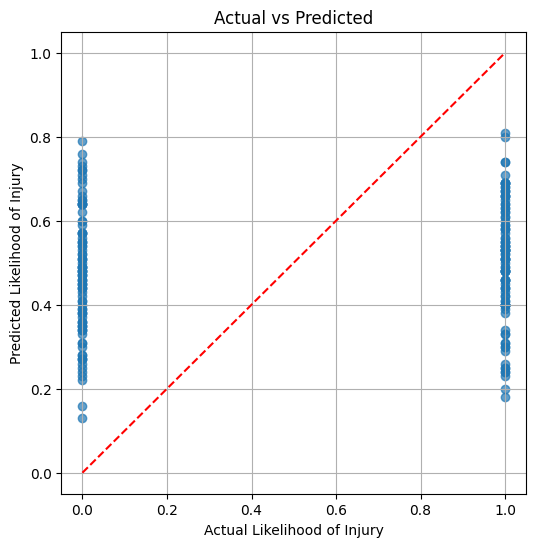

In [ ]:
# 📌 Step 6: Evaluate the Model
y_pred = model.predict(X_test)

print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 📊 Scatter plot of actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual Likelihood of Injury")
plt.ylabel("Predicted Likelihood of Injury")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


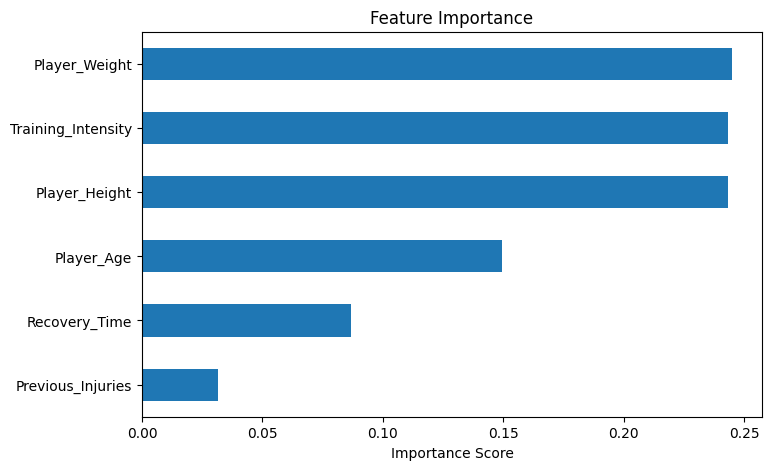

In [ ]:
# 📌 Step 7: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 5), title='Feature Importance')
plt.xlabel("Importance Score")
plt.show()


In [ ]:
# 📌 Step 8: Predict Injury Likelihood for a New Player
new_player = pd.DataFrame([{
    'Player_Age': 25,
    'Player_Weight': 70,
    'Player_Height': 175,
    'Previous_Injuries': 1,
    'Training_Intensity': 85,
    'Recovery_Time': 3
}])

prediction = model.predict(new_player)
print("\n🎯 Predicted Likelihood of Injury: {:.2f}".format(prediction[0]))



🎯 Predicted Likelihood of Injury: 0.67


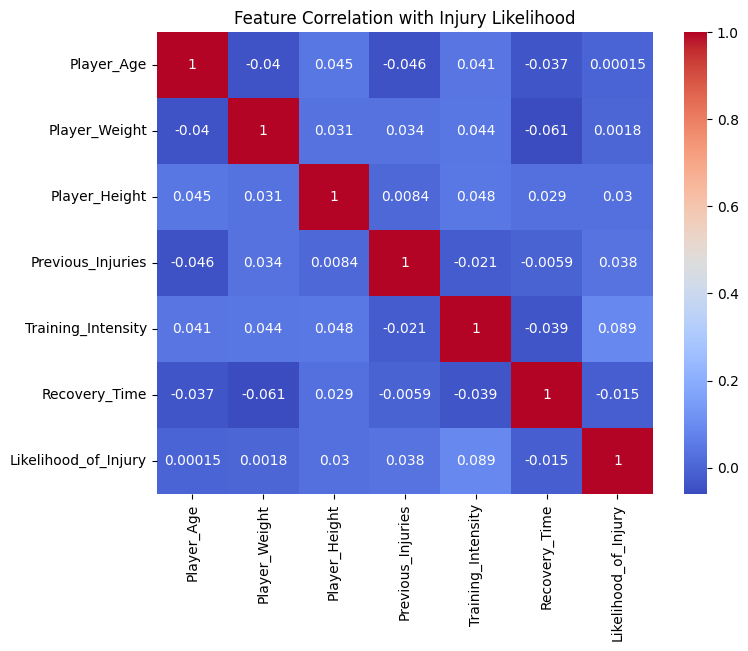

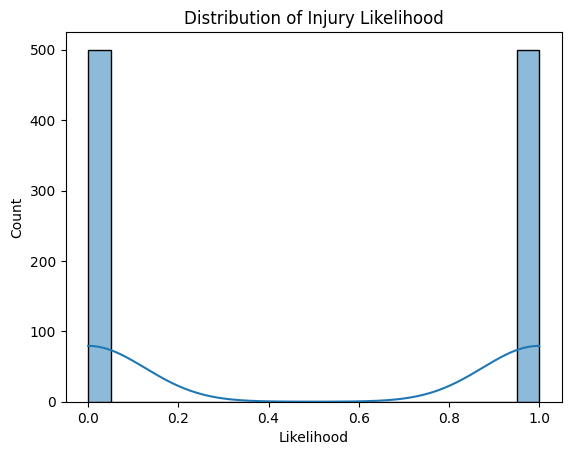

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Injury Likelihood')
plt.show()

# Distribution Plot
sns.histplot(df['Likelihood_of_Injury'], kde=True, bins=20)
plt.title('Distribution of Injury Likelihood')
plt.xlabel('Likelihood')
plt.ylabel('Count')
plt.show()
